In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
data.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
96880,150954,35069,1,Sophie Sassardn,52.0,773099216.0,Writer,105842.960,9094.246667,7.0,7.0,15.0,2.0,"Home Equity Loan, and Mortgage Loan",7.0,8.0,1.20,0.0,Standard,303.24,38.869524,220.0,No,122.930182,127.100738,High_spent_Medium_value_payments,909.393747,Standard
15969,29587,21605,2,Michaelh,35.0,639702163.0,Musician,68332.180,5513.348333,7.0,6.0,20.0,0.0,No Data,23.0,17.0,8.92,1.0,Standard,380.03,28.667855,318.0,No,0.000000,45.472356,High_spent_Medium_value_payments,659.174788,Standard
1373,7691,50043,6,Thomaso,30.0,919053349.0,Teacher,9783.245,908.270417,8.0,6.0,29.0,8.0,"Not Specified, Credit-Builder Loan, Not Specif...",45.0,17.0,7.75,7.0,Bad,1684.06,33.390044,226.0,NM,52.839134,31.691551,Low_spent_Small_value_payments,207.482352,Poor
19563,34977,35769,4,George Georgiopoulosi,22.0,24410864.0,Developer,38477.400,3374.450000,9.0,8.0,22.0,3.0,"Credit-Builder Loan, Personal Loan, and Home E...",22.0,17.0,9.21,12.0,Bad,2343.60,33.300752,148.0,Yes,89.536643,27.370910,High_spent_Medium_value_payments,399.451623,Poor
45081,73255,26027,2,Kareni,38.0,310133662.0,Entrepreneur,19592.580,1405.715000,5.0,7.0,21.0,4.0,"Home Equity Loan, Student Loan, Home Equity Lo...",16.0,17.0,8.82,7.0,Standard,2391.39,25.276226,152.0,Yes,40.496882,48.518017,Low_spent_Medium_value_payments,255.298220,Poor


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [7]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
data.describe(include=object)

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


In [9]:
data = data.drop(['ID', 'Customer_ID', 'Name', 'Month', 'SSN', 'Type_of_Loan', 'Payment_Behaviour'], axis = 1)

In [10]:
data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,284.629162,Good
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,331.209863,Good
3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,341.489231,Good


In [11]:
data.Occupation.value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

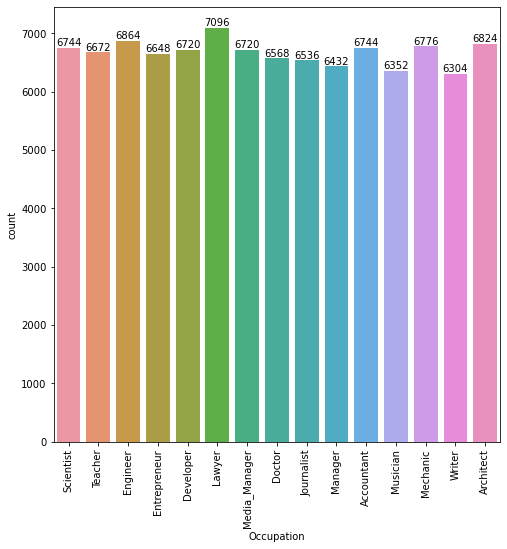

In [12]:
plt.figure(figsize = (8, 8))
ax = sbn.countplot(x = data.Occupation)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

In [13]:
data.Credit_Mix.value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

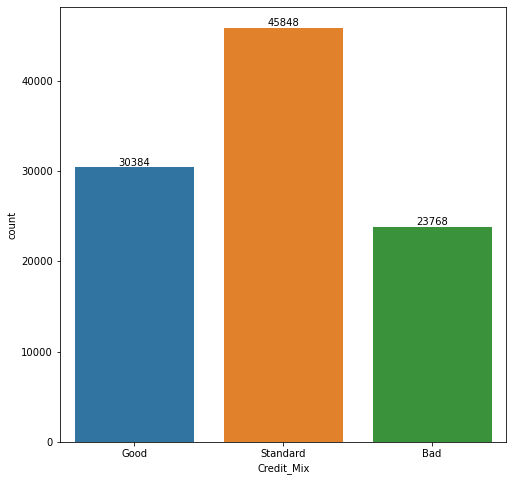

In [14]:
plt.figure(figsize = (8, 8))
bx = sbn.countplot(x = data.Credit_Mix)
bx.bar_label(bx.containers[0]);
#bx.set_xticklabels(bx.get_xticklabels(), rotation = 90);

In [15]:
data.Credit_Score.value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

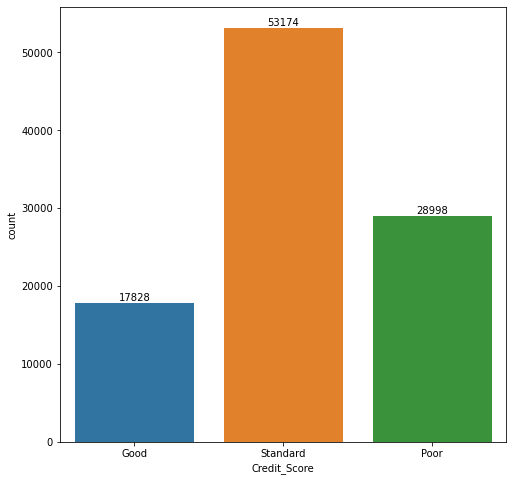

In [16]:
plt.figure(figsize = (8, 8))
cx = sbn.countplot(x = data.Credit_Score)
cx.bar_label(cx.containers[0]);

In [17]:
data.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.091525,0.090636,-0.190415,-0.148567,-0.217557,-0.213533,-0.174119,-0.184264,-0.157254,-0.250960,-0.202374,0.025492,0.234618,-0.047334,0.071045,0.116098
Annual_Income,0.091525,1.000000,0.998154,-0.284060,-0.217852,-0.302352,-0.255560,-0.250105,-0.286297,-0.176353,-0.280242,-0.269319,0.175930,0.272374,0.438106,0.806281,0.625640
Monthly_Inhand_Salary,0.090636,0.998154,1.000000,-0.283181,-0.216847,-0.301858,-0.254298,-0.249438,-0.285360,-0.176187,-0.279736,-0.269044,0.176092,0.271457,0.421836,0.807326,0.626631
Num_Bank_Accounts,-0.190415,-0.284060,-0.283181,1.000000,0.442694,0.584302,0.472483,0.560193,0.601842,0.333794,0.518323,0.507063,-0.071783,-0.485331,0.050035,-0.227828,-0.286709
Num_Credit_Card,-0.148567,-0.217852,-0.216847,0.442694,1.000000,0.497912,0.417960,0.479762,0.423300,0.255495,0.459429,0.490376,-0.055249,-0.417205,0.058853,-0.174600,-0.231913
Interest_Rate,-0.217557,-0.302352,-0.301858,0.584302,0.497912,1.000000,0.559156,0.589185,0.571457,0.370156,0.632562,0.629414,-0.075700,-0.576230,0.071651,-0.242479,-0.317919
Num_of_Loan,-0.213533,-0.255560,-0.254298,0.472483,0.417960,0.559156,1.000000,0.501599,0.473919,0.374602,0.565087,0.638713,-0.100469,-0.605727,0.328485,-0.214254,-0.429416
Delay_from_due_date,-0.174119,-0.250105,-0.249438,0.560193,0.479762,0.589185,0.501599,1.000000,0.541627,0.296571,0.539919,0.572206,-0.063823,-0.491484,0.078820,-0.201737,-0.272273
Num_of_Delayed_Payment,-0.184264,-0.286297,-0.285360,0.601842,0.423300,0.571457,0.473919,0.541627,1.000000,0.329311,0.499689,0.504019,-0.073774,-0.481965,0.053653,-0.228459,-0.286045
Changed_Credit_Limit,-0.157254,-0.176353,-0.176187,0.333794,0.255495,0.370156,0.374602,0.296571,0.329311,1.000000,0.382673,0.463684,-0.047903,-0.429230,0.068333,-0.146724,-0.198706


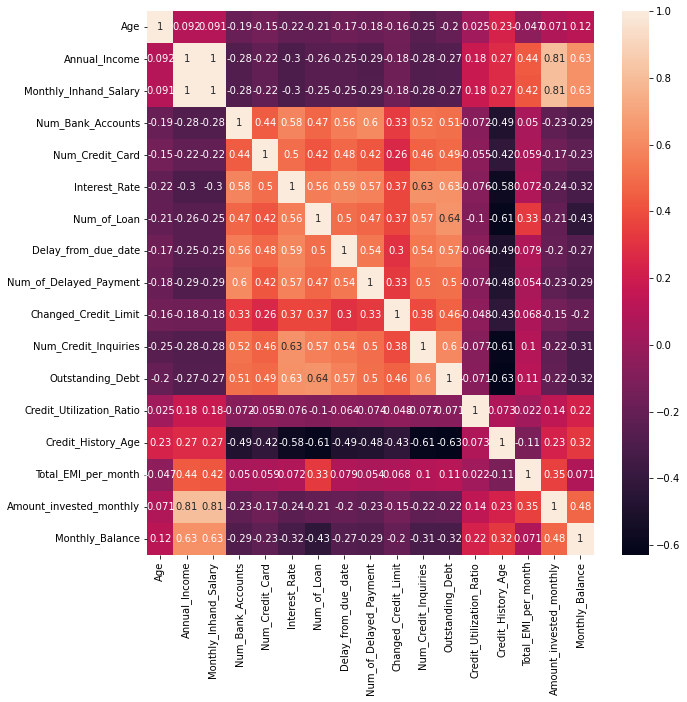

In [18]:
plt.figure(figsize = (10, 10))
sbn.heatmap(data.corr(), annot = True);

In [19]:
data.sample(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
71177,23.0,Engineer,21404.24,1887.686667,4.0,6.0,10.0,2.0,21.0,18.0,15.44,5.0,Standard,132.26,33.047052,167.0,Yes,21.310599,14.809830,324.278390,Standard
63265,35.0,Scientist,12421.12,1002.093333,7.0,3.0,11.0,4.0,15.0,14.0,4.95,0.0,Standard,685.18,27.200347,251.0,No,29.379389,22.070887,262.730389,Standard
24173,33.0,Journalist,17774.97,1233.247500,6.0,9.0,33.0,9.0,54.0,25.0,28.93,13.0,Bad,3183.68,38.226867,122.0,Yes,126.710179,32.293703,210.312215,Standard
93628,55.0,Entrepreneur,35681.42,2918.451667,4.0,4.0,6.0,2.0,15.0,8.0,11.32,2.0,Standard,133.30,28.055966,296.0,No,53.778692,44.668349,443.398126,Standard
91377,22.0,Journalist,14070.22,1148.518333,9.0,9.0,24.0,6.0,39.0,15.0,20.61,8.0,Bad,2075.81,27.846875,160.0,Yes,40.165737,27.170115,304.055024,Poor


In [20]:
d = {'Bad' : 0, 'Standard' : 1, 'Good' : 2}
data['Credit_Mix'] = data['Credit_Mix'].map(d)

In [21]:
data.Payment_of_Min_Amount = data.Payment_of_Min_Amount.str.replace('NM', 'No')

In [22]:
d1 = {'Yes' : 1, 'No' : 0}
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].map(d1)
data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2,809.98,26.822620,265.0,0,49.574949,21.46538,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,2,809.98,31.944960,266.0,0,49.574949,21.46538,284.629162,Good
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2,809.98,28.609352,267.0,0,49.574949,21.46538,331.209863,Good
3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,2,809.98,31.377862,268.0,0,49.574949,21.46538,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,2,809.98,24.797347,269.0,0,49.574949,21.46538,341.489231,Good


In [23]:
x = data.drop('Credit_Score', axis = 1)
y = data['Credit_Score']

In [24]:
x = pd.get_dummies(x, drop_first = True)
x

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2,809.98,26.822620,265.0,0,49.574949,21.465380,312.494089,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,2,809.98,31.944960,266.0,0,49.574949,21.465380,284.629162,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2,809.98,28.609352,267.0,0,49.574949,21.465380,331.209863,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,2,809.98,31.377862,268.0,0,49.574949,21.465380,223.451310,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,2,809.98,24.797347,269.0,0,49.574949,21.465380,341.489231,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,2,502.38,34.663572,378.0,0,35.104023,24.028477,479.866228,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,2,502.38,40.565631,379.0,0,35.104023,24.028477,496.651610,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,3.0,2,502.38,41.255522,380.0,0,35.104023,24.028477,516.809083,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,3.0,2,502.38,33.638208,381.0,0,35.104023,24.028477,319.164979,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [25]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score

In [36]:
def classification1(x, y):  # y = sozel
    dt = DecisionTreeClassifier()
    #et = ExtraTreeClassifier()
    #ab = AdaBoostClassifier()
    #bc = BaggingClassifier()
    #ets = ExtraTreesClassifier()
    #gb = GradientBoostingClassifier()
    rf = RandomForestClassifier()
    #b = BernoulliNB()
    #g = GaussianNB()
    #m = MultinomialNB()
    #kn = KNeighborsClassifier()
    #xg = XGBClassifier()
    
    models = [dt, rf]
    model_names = ['DecisionTree', 'RandomForest']
    acc = []
    #cf = []
    #Re = []
    #pc = []
    
    sonuc = pd.DataFrame(columns = ['Accuracy'], index = model_names)
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc.append(accuracy_score(y_true, y_pred) * 100)
     #   cf.append(confusion_matrix(y_true, y_pred))
     #   Re.append(recall_score(y_true, y_pred) * 100)   # for binary
      #  pc.append(precision_score(y_true, y_pred) * 100)
        
    sonuc['Accuracy'] = acc
    #sonuc['Confusion_Matrix'] = cf
    #sonuc['Recall_Score'] = Re
    #sonuc['Precision_Score'] = pc
    
    return sonuc.sort_values('Accuracy', ascending = False)

In [37]:
classification1(x, y)

,Accuracy
RandomForest,81.53
DecisionTree,73.29


In [45]:
def classification2(x, y):  # sayısal
    dt = DecisionTreeClassifier()
    #et = ExtraTreeClassifier()
    ab = AdaBoostClassifier()
    #bc = BaggingClassifier()
    #ets = ExtraTreesClassifier()
    gb = GradientBoostingClassifier()
    rf = RandomForestClassifier()
    b = BernoulliNB()
    g = GaussianNB()
    #m = MultinomialNB()
    kn = KNeighborsClassifier()
    xg = XGBClassifier()
    
    models = [dt, ab, gb, rf, b, g, kn, xg]
    model_names = ['DecisionTree', 'AdaBoost', 'GradientBoost', 'RandomForest',
                  'Bernoulli', 'Gaussian', 'KNN', 'XGBoost']
    acc = []
    #cf = []
    #Re = []
    #pc = []
    
    sonuc = pd.DataFrame(columns = ['Accuracy2'], index = model_names)
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    #x_train = StandardScaler().fit_transform(x_train)
    #x_test = StandardScaler().fit_transform(x_test)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc.append(accuracy_score(y_true, y_pred) * 100)
     #   cf.append(confusion_matrix(y_true, y_pred))
     #   Re.append(recall_score(y_true, y_pred) * 100)   # for binary
      #  pc.append(precision_score(y_true, y_pred) * 100)
        
    sonuc['Accuracy2'] = acc
    #sonuc['Confusion_Matrix'] = cf
    #sonuc['Recall_Score'] = Re
    #sonuc['Precision_Score'] = pc
    
    return sonuc.sort_values('Accuracy2', ascending = False)

In [39]:
y1 = data['Credit_Score'].map({'Poor' : 0, 'Standard' : 1, 'Good' : 2})

In [46]:
classification2(x, y1)

,Accuracy2
RandomForest,81.555
KNN,77.680
XGBoost,77.395
DecisionTree,75.545
GradientBoost,71.485
AdaBoost,67.365
Gaussian,60.395
Bernoulli,57.460


### DL

In [86]:
x_train, x_test, y_train, y_true = train_test_split(x, y1, test_size = 0.2, random_state = 42)  # sayısal y
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [110]:
model = Sequential()
model.add(Dense(units = 124, activation = 'relu'))
model.add(Dense(units = 124, activation = 'relu'))
model.add(Dense(units = 124, activation = 'relu'))
model.add(Dense(units = 124, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 4, activation = 'relu'))
model.add(Dense(units = 1, activation = 'relu'))

model.compile(loss = 'binary_crossentropy', metrics = 'accuracy', optimizer = 'adamax')

In [111]:
early_stopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25)

In [112]:
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_true), batch_size = 128, verbose = 1, callbacks = [early_stopping])

Epoch 1/100
625/625 [==============================] - 2s 2ms/step - loss: -1.1762 - accuracy: 0.5830 - val_loss: -1.2710 - val_accuracy: 0.6151
Epoch 2/100
625/625 [==============================] - 1s 2ms/step - loss: -1.3327 - accuracy: 0.6228 - val_loss: -1.2839 - val_accuracy: 0.6260
Epoch 3/100
625/625 [==============================] - 1s 2ms/step - loss: -1.3491 - accuracy: 0.6298 - val_loss: -1.2768 - val_accuracy: 0.6289
Epoch 4/100
625/625 [==============================] - 1s 2ms/step - loss: -1.3603 - accuracy: 0.6336 - val_loss: -1.3075 - val_accuracy: 0.6326
Epoch 5/100
625/625 [==============================] - 1s 2ms/step - loss: -1.3748 - accuracy: 0.6345 - val_loss: -1.3050 - val_accuracy: 0.6357
Epoch 6/100
625/625 [==============================] - 1s 2ms/step - loss: -1.3828 - accuracy: 0.6370 - val_loss: -1.3173 - val_accuracy: 0.6365
Epoch 7/100
625/625 [==============================] - 1s 2ms/step - loss: -1.3895 - accuracy: 0.6383 - val_loss: -1.3313 - val_ac

625/625 [==============================] - 1s 2ms/step - loss: -1.5278 - accuracy: 0.6587 - val_loss: -1.4068 - val_accuracy: 0.6527
Epoch 58/100
625/625 [==============================] - 1s 2ms/step - loss: -1.5157 - accuracy: 0.6576 - val_loss: -1.3402 - val_accuracy: 0.6466
Epoch 59/100
625/625 [==============================] - 1s 2ms/step - loss: -1.5299 - accuracy: 0.6595 - val_loss: -1.4094 - val_accuracy: 0.6527
Epoch 60/100
625/625 [==============================] - 1s 2ms/step - loss: -1.5240 - accuracy: 0.6590 - val_loss: -1.3952 - val_accuracy: 0.6515
Epoch 61/100
625/625 [==============================] - 1s 2ms/step - loss: -1.5253 - accuracy: 0.6583 - val_loss: -1.4132 - val_accuracy: 0.6527
Epoch 62/100
625/625 [==============================] - 1s 2ms/step - loss: -1.5305 - accuracy: 0.6598 - val_loss: -1.4074 - val_accuracy: 0.6543
Epoch 63/100
625/625 [==============================] - 1s 2ms/step - loss: -1.5156 - accuracy: 0.6586 - val_loss: -1.4046 - val_accuracy

In [113]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_129 (Dense)           (None, 124)               4216      
                                                                 
 dense_130 (Dense)           (None, 124)               15500     
                                                                 
 dense_131 (Dense)           (None, 124)               15500     
                                                                 
 dense_132 (Dense)           (None, 124)               15500     
                                                                 
 dense_133 (Dense)           (None, 64)                8000      
                                                                 
 dense_134 (Dense)           (None, 16)                1040      
                                                                 
 dense_135 (Dense)           (None, 8)               

In [115]:
model.evaluate(x_train, y_train)

2500/2500 [==============================] - 2s 826us/step - loss: -1.6780 - accuracy: 0.6700


[-1.677976369857788, 0.6699749827384949]

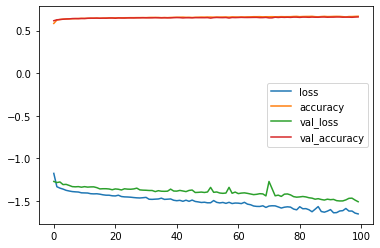

In [117]:
loss = pd.DataFrame(history.history)
loss.plot();

## Best score is Random Forest = 81.83

In [119]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(x_train, y_train)
tahmin = model.predict(x_test)
accuracy_score(tahmin, y_true)

0.8183